# Cài đặt môi trường

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Project/steel_weld_tube/

/content/drive/MyDrive/Project/steel_weld_tube


In [ ]:
!ls
!pip install opencv-python

data.yaml  train  train.txt  valid  val.txt


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Hàm tìm path cho label và image
def get_image_label_paths(data_dir, subset):
    image_label_paths = []
    subset_dir = os.path.join(data_dir, subset)

    image_dir = os.path.join(subset_dir, "images")
    label_dir = os.path.join(subset_dir, "labels")

    image_files = sorted(os.listdir(image_dir))
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        label_file = os.path.splitext(image_file)[0] + ".txt"
        label_path = os.path.join(label_dir, label_file)

        if os.path.exists(label_path):
            image_label_paths.append({
                "image_path": image_path,
                "label_path": label_path
            })

    return image_label_paths

# Hàm in ảnh ban đầu(chưa có bndbox và label)
def show_original_image(image_path):
  image = cv2.imread(image_path)
  cv2_imshow(image)

# Hàm in ảnh với label
def show_labeled_image(image, label_path):
  image_copy = image.copy()
  with open(label_path, "r") as label_file:
    lines = label_file.readlines()
    for line in lines:
        data = line.strip().split()
        if len(data) == 5:  # Đảm bảo dòng có đúng định dạng (class x_center y_center width height)
            # Tính tọa độ ban đầu của bndbox trước khi resize bỏi
            class_id = int(data[0])
            x_center = float(data[1]) * image_copy.shape[1]
            y_center = float(data[2]) * image_copy.shape[0]
            width = float(data[3]) * image_copy.shape[1]
            height = float(data[4]) * image_copy.shape[0]

            # Tính toạ độ góc trái trên và góc phải dưới của bounding box
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)

            # Màu và tên lớp cho từng dòng
            class_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),
                            (255, 0, 255), (0, 255, 255), (128, 0, 0), (0, 128, 0)]  # Màu cho từng lớp
            class_names = ['Blowhole','Undercut','Broken arc','Crack','Overlap','Slag inclusion','Lack of fusion','Unfused']

            # Vẽ bounding box lên hình ảnh
            color = class_colors[class_id]
            thickness = 1 if (class_id == 0) else 2 # Độ dày đường viền
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), color, thickness)

            # Thêm tên lớp
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.5
            text = class_names[class_id]
            text_color = (255,255,255)
            text_thickness = 1
            cv2.putText(image_copy, text, (x1, y1 - 5), font, font_scale, text_color, text_thickness)

  cv2_imshow(image_copy)


In [ ]:
def get_image_and_label(image_path, label_path):

  with open(label_path, "r") as label_file:
    lines = label_file.readlines()
    labels =[]
    for line in lines:
        data = line.strip().split()
        if len(data) == 5:  # Đảm bảo dòng có đúng định dạng (class x_center y_center width height)
            # Tính tọa độ ban đầu của bndbox trước khi resize bỏi
            class_id = int(data[0])
            x_center = float(data[1]) * image.shape[1]
            y_center = float(data[2]) * image.shape[0]
            width = float(data[3]) * image.shape[1]
            height = float(data[4]) * image.shape[0]

            # Tính toạ độ góc trái trên và góc phải dưới của bounding box
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)

            labels.append({'class_id': class_id, 'xmin': x1, 'ymin': y1, 'xmax': x2, 'ymax': y2})

  return cv2.imread(image_path), labels

/content/drive/MyDrive/Project/steel_weld_tube/train/images/air-hole12(hollow-bead)-108.jpg
/content/drive/MyDrive/Project/steel_weld_tube/train/labels/air-hole12(hollow-bead)-108.txt


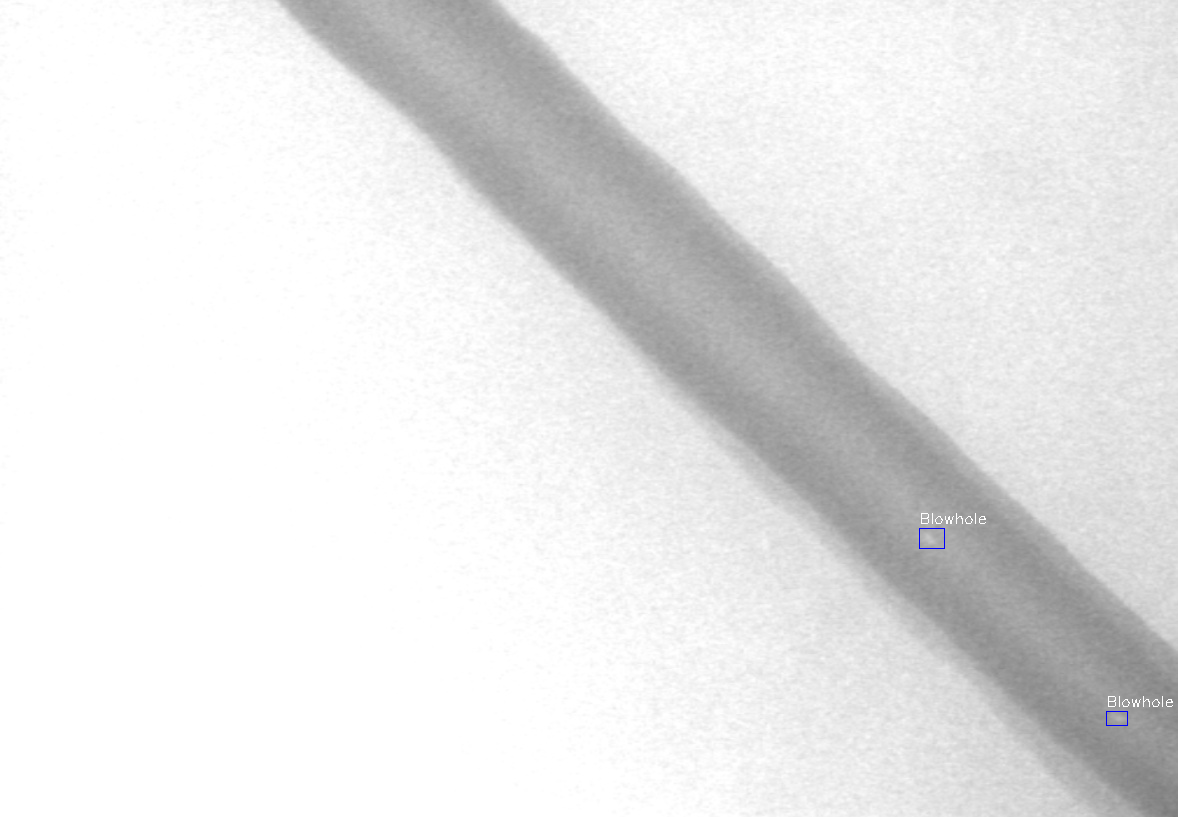

In [ ]:
data_dir = os.getcwd()
subset = 'train'
subset_dir = os.path.join(data_dir, subset)

# image_dir = os.path.join(subset_dir, 'images')
# label_dir = os.path.join(subset_dir, 'labels')

# image_files = sorted(os.listdir(image_dir))
# image_file = image_files[0]
# image_path = os.path.join(image_dir,image_file)
# image = cv2.imread(image_path)
# print(image_path)

# label_file = image_files[0].replace('.jpg','.txt')
# label_path = os.path.join(label_dir,label_file)

image_label_paths = get_image_label_paths(data_dir, subset)
image_path = image_label_paths[500]['image_path']
label_path = image_label_paths[500]['label_path']
print(image_path)
print(label_path)
show_labeled_image(cv2.imread(image_path), label_path)

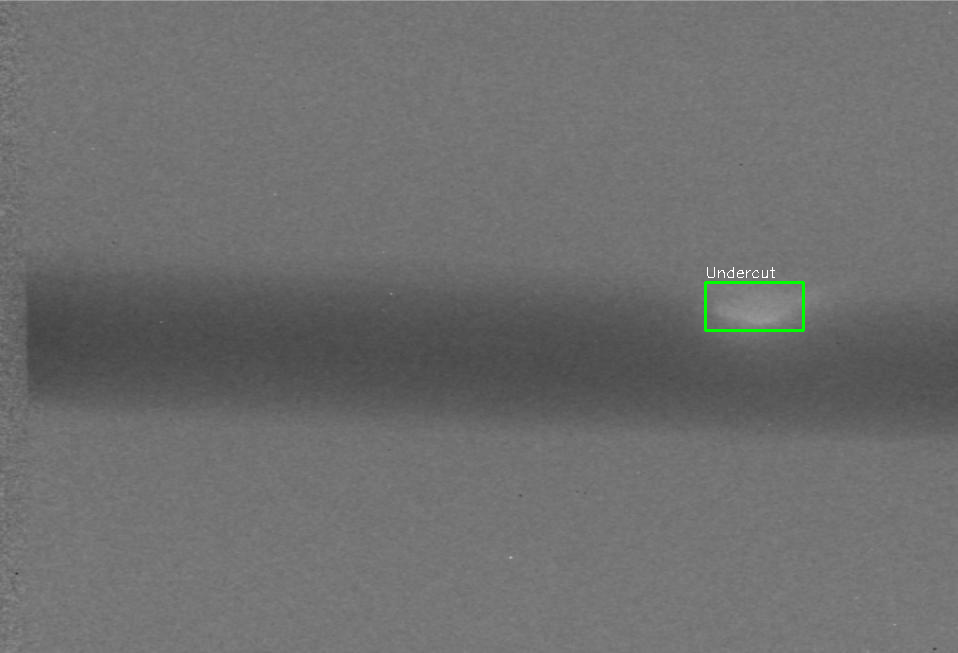

In [ ]:
image_path = '/content/drive/MyDrive/Project/steel_weld_tube/valid/images/bite-edge2-09.jpg'
label_path = '/content/drive/MyDrive/Project/steel_weld_tube/valid/labels/bite-edge2-09.txt'
image = cv2.imread(image_path)
show_labeled_image(cv2.imread(image_path), label_path)
image, labels = get_image_and_label(image_path,label_path)

# Tạo các hàm để tăng cường dữ liệu

In [ ]:
import cv2
import random
import numpy as np
import math
import skimage

def change_light(image_origin):
    image = image_origin.copy()
    # Thay đổi độ sáng và tối
    gamma = random.uniform(0.4, 2.5)
    while gamma == 1:
        gamma = random.uniform(0.4, 2.5)

    # Điều chỉnh độ sáng bằng cách nhân ảnh với alpha
    alpha = 1.0 / gamma
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha)

    return adjusted_image


def rotate_image(image_origin, label_path, angle=5, scale=1.0):

    image = image_origin.copy()
    # Kích thước ảnh gốc
    h, w = image.shape[:2]

    # Tính toán kích thước mới của ảnh sau khi xoay
    rangle = np.deg2rad(angle)
    new_h = int((abs(np.cos(rangle)) * h + abs(np.sin(rangle)) * w) * scale)
    new_w = int((abs(np.sin(rangle)) * h + abs(np.cos(rangle)) * w) * scale)

    # Tạo ma trận xoay
    rot_mat = cv2.getRotationMatrix2D((new_w / 2, new_h / 2), angle, scale)
    rot_move = np.dot(rot_mat, np.array([(new_w - w) / 2, (new_h - h) / 2, 0]))
    rot_mat[0,2]+= rot_move[0]
    rot_mat[1,2]+= rot_move[1]
    # Thực hiện xoay ảnh
    rot_img = cv2.warpAffine(image, rot_mat, (new_w, new_h), flags=cv2.INTER_LANCZOS4)
    rot_boxes = []
    with open(label_path,'r') as label_file:
      lines = label_file.readlines()
      for line in lines:
        data = line.strip().split();
        if len(data) == 5:  # Đảm bảo dòng có đúng định dạng (class x_center y_center width height)
                class_id = int(data[0])
                x_center = float(data[1]) * image.shape[1]
                y_center = float(data[2]) * image.shape[0]
                width = float(data[3]) * image.shape[1]
                height = float(data[4]) * image.shape[0]
                xmin = int(x_center - width / 2)
                ymin = int(y_center - height / 2)
                xmax = int(x_center + width / 2)
                ymax = int(y_center + height / 2)

        points = np.array([[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]])
        rotated_points = cv2.transform(np.array([points]), rot_mat)[0]

        rx, ry, rw, rh = cv2.boundingRect(rotated_points)
        rot_boxes.append({'class_id': class_id,'xmin': rx, 'ymin': ry, 'xmax': rx + rw, 'ymax': ry + rh})

    return rot_img, rot_boxes


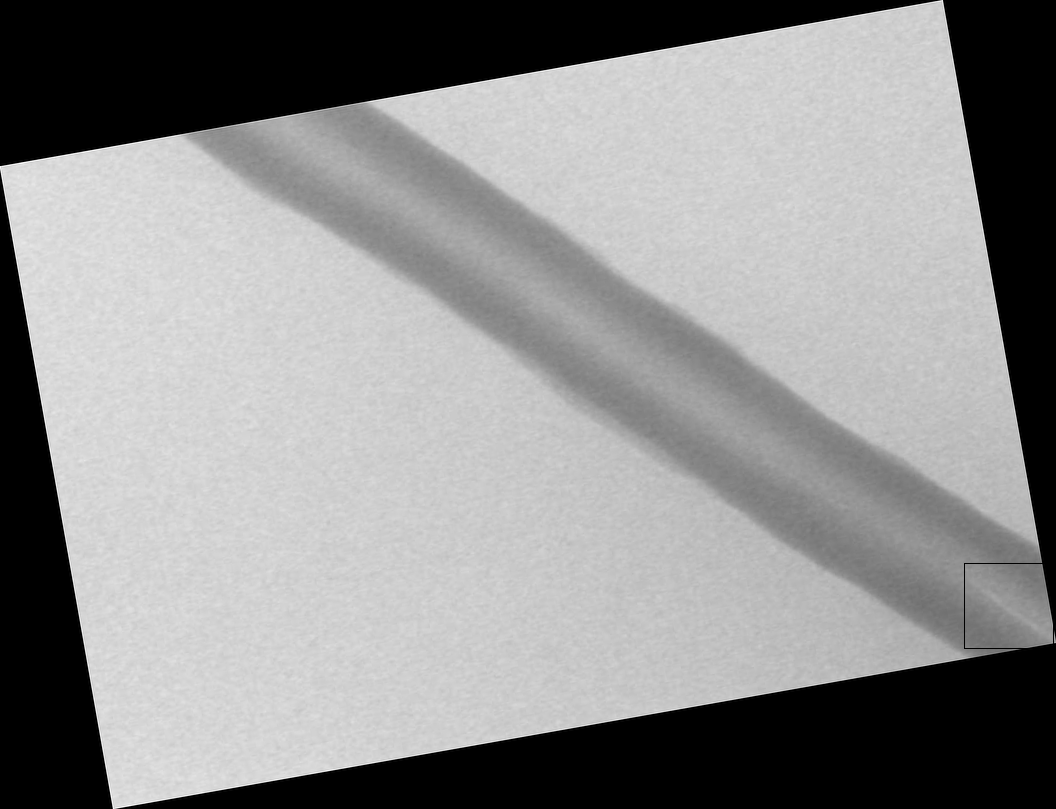

In [ ]:
rotated_image, rotated_bboxes = rotate_image(image, label_path, angle = 10)
for bnb in rotated_bboxes:
  cv2.rectangle(rotated_image, (bnb['xmin'],bnb['ymin']),(bnb['xmax'],bnb['ymax']),(0,0,0),1)
cv2_imshow(rotated_image)

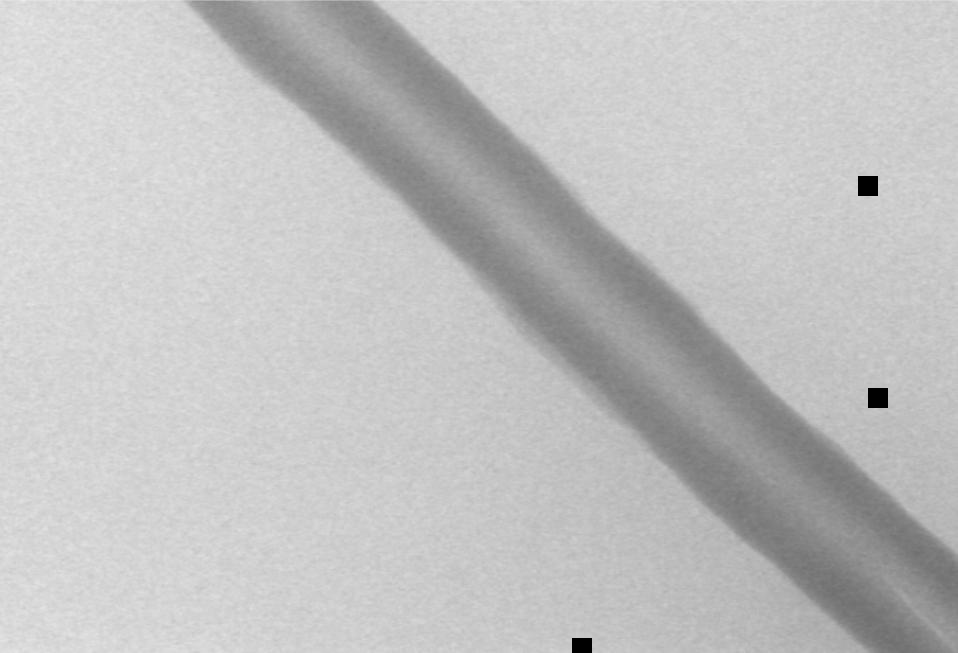

In [ ]:
def cutout(image_origin, bndboxes, length=20, hole_num=1, threshold=0.5):
    image = image_origin.copy()
    h, w, c = image.shape

    mask = np.ones((h, w, c), np.int32)

    for i in range(hole_num):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - length // 2, 0, h)
        y2 = np.clip(y + length // 2, 0, h)
        x1 = np.clip(x - length // 2, 0, w)
        x2 = np.clip(x + length // 2, 0, w)

        mask[y1:y2, x1:x2] = 0

    image = image * mask

    # for box in bndboxes:
    #     cv2.rectangle(image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 0), 2)

    return image

cv2_imshow(cutout(image,labels,hole_num =3))

In [ ]:
def gaussian_noise(image_origin):

    image = image_origin.copy()
    mean = 0
    variance = 0.05
    sigma = variance ** 0.5
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gaussian_noise)
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

# Thêm nhiễu Gaussian
noisy_image = gaussian_noise(image)

# # Tính toán sự khác biệt pixel-by-pixel giữa ảnh gốc và ảnh có nhiễu
# difference = cv2.absdiff(image, noisy_image)

# # Chuyển ảnh sự khác biệt sang ảnh đen trắng (binary)
# threshold = 30  # Ngưỡng để xác định pixel có sự khác biệt
# difference_binary = cv2.threshold(difference, threshold, 255, cv2.THRESH_BINARY)[1]
# print(np.sum(difference_binary))

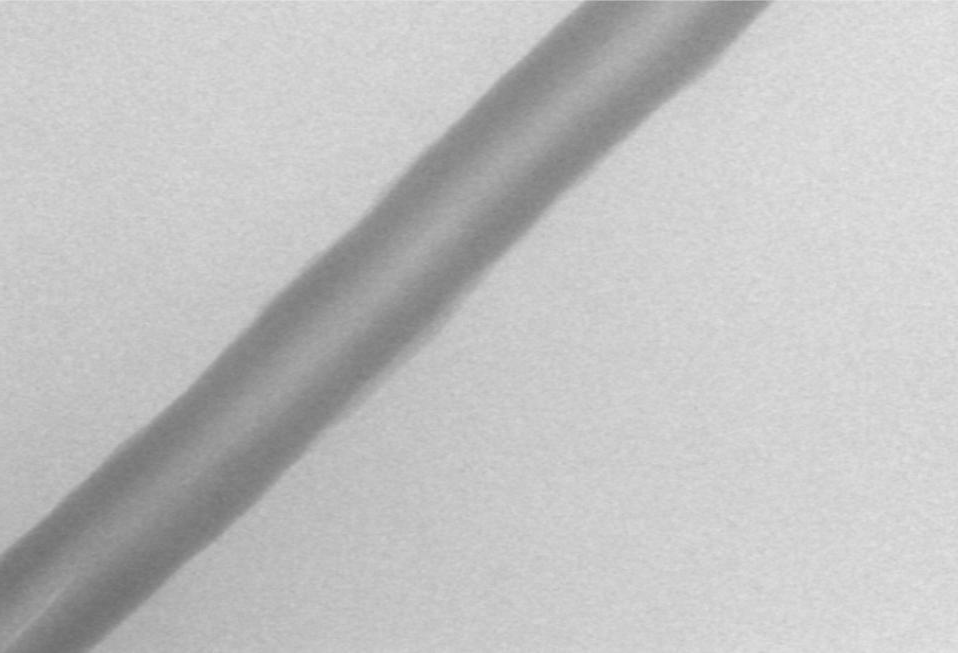

In [ ]:
def flip(image_origin, bndboxes):

    image = image_origin.copy()
    h, w = image.shape[:2]

    # Thực hiện phép đối xứng ngang (horizontal flip)
    flipped_image = cv2.flip(image, 1)

    # Cập nhật tọa độ của bounding boxes
    flipped_bndboxes = []
    for box in bndboxes:
        xmin = w - 1 - box['xmax']  # Cập nhật xmin và xmax
        xmax = w - 1 - box['xmin']
        flipped_bndboxes.append({'class_id': box['class_id'],'xmin': xmin, 'ymin': box['ymin'], 'xmax': xmax, 'ymax': box['ymax']})

    # Vẽ bounding boxes trên ảnh sau khi đối xứng
    # for box in flipped_bndboxes:
    #     cv2.rectangle(flipped_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 0), 2)

    return flipped_image, flipped_bndboxes
flipped_image, flipped_bndboxes = flip(image,labels)
cv2_imshow(flipped_image)

In [ ]:
from PIL import Image, ImageEnhance

def color(image_origin):
    image = image_origin.copy()
    # Chuyển đổi ảnh từ BGR sang RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_pil = Image.fromarray(image)

    # Tăng cường màu sắc (Color)
    ran_color = np.random.randint(0, 31) / 10.
    image_pil = ImageEnhance.Color(image_pil).enhance(ran_color)

    # Tăng cường độ tương phản (Contrast)
    ran_contrast = np.random.randint(10, 21) / 10.
    image_pil = ImageEnhance.Contrast(image_pil).enhance(ran_contrast)

    # Tăng cường độ sắc nét (Sharpness)
    ran_sharpness = np.random.randint(0, 31) / 10.
    image_pil = ImageEnhance.Sharpness(image_pil).enhance(ran_sharpness)
    # Trả về ảnh BGR sau khi chỉnh màu
    colored_image = np.array(image_pil)
    colored_image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2BGR)

    return colored_image

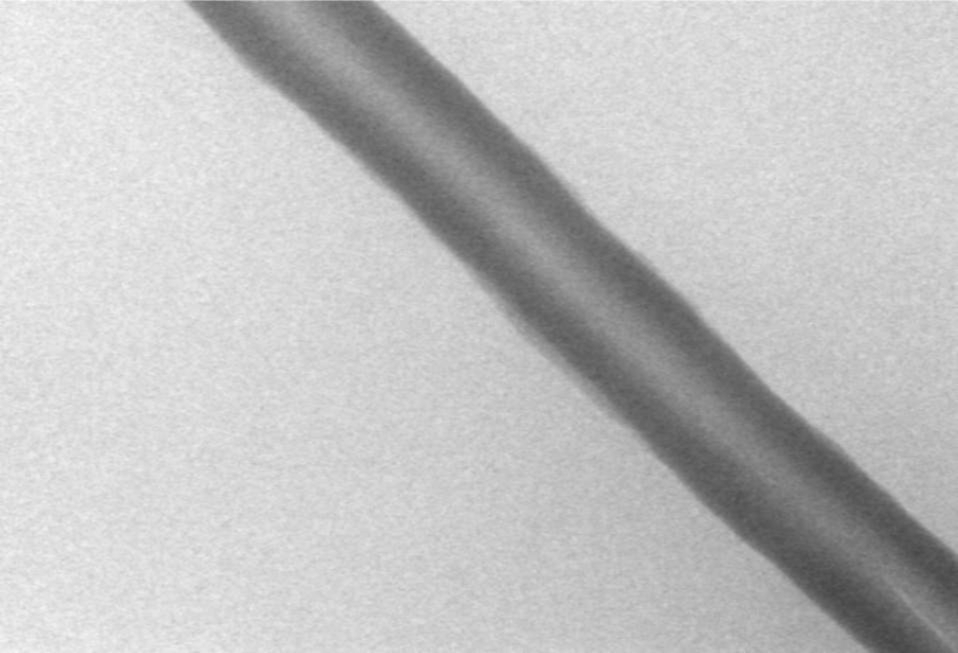

In [ ]:
cv2_imshow(color(image))

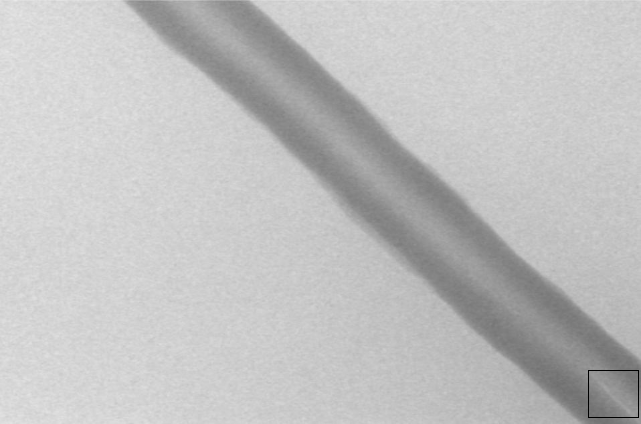

In [ ]:
import copy
def resize(image_origin, labels):

    image = image_origin.copy()
    h, w = image.shape[:2]
    ran_h = np.random.randint(h * 0.5, h)
    ran_w = np.random.randint(w * 0.5, w)

    # Resize ảnh
    resized_image = cv2.resize(image.copy(), (ran_w, ran_h), interpolation=cv2.INTER_LINEAR)

    # Cập nhật tọa độ bounding boxes
    new_labels = copy.deepcopy(labels)
    for label in new_labels:
        class_id = label['class_id']
        xmin, ymin, xmax, ymax = label['xmin'], label['ymin'], label['xmax'], label['ymax']
        label['xmin'] = int((ran_w / w) * xmin)
        label['xmax'] = int((ran_w / w) * xmax)
        label['ymin'] = int((ran_h / h) * ymin)
        label['ymax'] = int((ran_h / h) * ymax)

    return resized_image, new_labels

resized_image, new_labels = resize(image, labels)
for label in new_labels:
  cv2.rectangle(resized_image,(label['xmin'],label['ymin']),(label['xmax'],label['ymax']),(0,0,0), 1)
cv2_imshow(resized_image)

In [ ]:
print(labels)

[{'class_id': 3, 'xmin': 879, 'ymin': 571, 'xmax': 955, 'ymax': 643}]


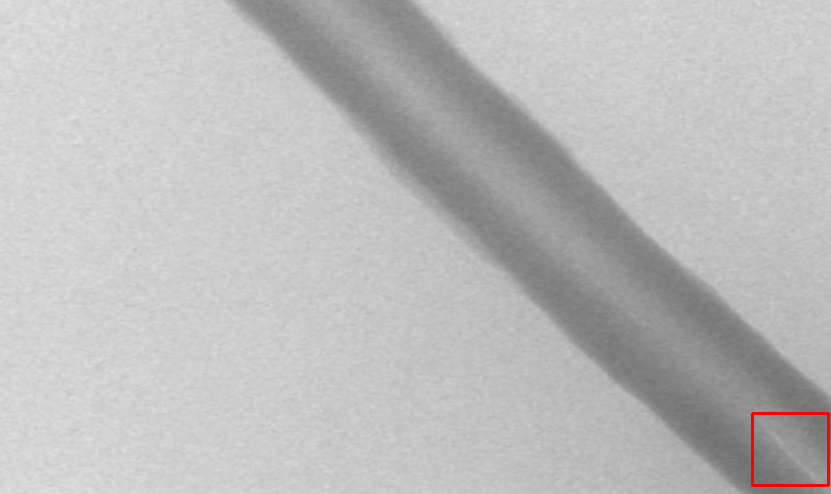

In [ ]:
import copy
def crop(image_origin, labels):
    image = image_origin.copy()
    w = image.shape[1]
    h = image.shape[0]
    xmin = w
    xmax = 0
    ymin = h
    ymax = 0

    # Tìm tọa độ bounding box lớn nhất
    for box in labels:
        xmin = min(xmin, box['xmin'])
        xmax = max(xmax, box['xmax'])
        ymin = min(ymin, box['ymin'])
        ymax = max(ymax, box['ymax'])

    # Tạo ngẫu nhiên tọa độ để cắt ảnh
    crop_left = random.randint(0, xmin)
    crop_right = random.randint(xmax, w)
    crop_top = random.randint(0, ymin)
    crop_bottom = random.randint(ymax, h)

    # Cắt ảnh
    cropped_image = image[crop_top:crop_bottom, crop_left:crop_right]

    # Cập nhật tọa độ bounding boxes
    for box in labels:
        box['xmin'] -= crop_left
        box['xmax'] -= crop_left
        box['ymin'] -= crop_top
        box['ymax'] -= crop_top
        cv2.rectangle(cropped_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 255), 2)

    return cropped_image

cv2_imshow(crop(image,copy.deepcopy(labels)))

In [ ]:

def crop(image_origin, labels):

    image = image_origin.copy()
    w = image.shape[1]
    h = image.shape[0]
    xmin = w
    xmax = 0
    ymin = h
    ymax = 0

    # Tìm tọa độ bounding box lớn nhất
    for box in labels:
        xmin = min(xmin, box['xmin'])
        xmax = max(xmax, box['xmax'])
        ymin = min(ymin, box['ymin'])
        ymax = max(ymax, box['ymax'])

    # Tạo ngẫu nhiên tọa độ để cắt ảnh
    crop_left = random.randint(0, xmin)
    crop_right = random.randint(xmax, w)
    crop_top = random.randint(0, ymin)
    crop_bottom = random.randint(ymax, h)

    # Sao chép ảnh gốc và danh sách labels
    cropped_image = image.copy()
    cropped_labels = copy.deepcopy(labels)

    # Cắt ảnh
    cropped_image = cropped_image[crop_top:crop_bottom, crop_left:crop_right]

    # Cập nhật tọa độ bounding boxes trong danh sách labels
    for box in cropped_labels:
        box['xmin'] -= crop_left
        box['xmax'] -= crop_left
        box['ymin'] -= crop_top
        box['ymax'] -= crop_top
        cv2.rectangle(cropped_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 255), 2)

    return cropped_image, cropped_labels

# cropped_image, cropped_labels  = crop(image,labels)
# for box in cropped_labels:
#   cv2.rectangle(cropped_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 255), 2)
# cv2_imshow(cropped_image)

# Tạo các hàm để thao tác in ra ảnh và labels sau khi đã xử lí

In [ ]:
import re

def insert_before_num_or_extension(input_str, ins_str):
    # Tìm số đầu tiên trong chuỗi
    match = re.search(r'\d', input_str, re.M | re.I)

    # Tìm định dạng file (ví dụ: .jpg)
    extension_match = re.search(r'\.[a-zA-Z0-9]+$', input_str)

    if match:
        # Nếu tìm thấy số, thì thay thế
        return re.sub(r'\d', ins_str + match.group(0), input_str, count=1)
    elif extension_match:
        # Nếu không tìm thấy số nhưng có định dạng file, thêm trước định dạng file
        return re.sub(extension_match.group(0), ins_str + extension_match.group(0), input_str)
    else:
        # Nếu không tìm thấy số và không có định dạng file, thêm vào cuối
        return input_str + ins_str
# input_str = image_label_paths[5]['image_path']
# print(insert_before_num_or_extension(input_str,'(cutout)'))

In [ ]:
def append_file_name(file_path,file_name):
     with open(file_path, 'a', encoding='utf-8') as file:
        file.write('\n'+file_name)
append_file_name('/content/drive/MyDrive/Project/abc.txt','air_hole_1')

In [ ]:
def create_new_image_file(image, labels, image_path, label_path):

    new_image_path = image_path.replace('steel_weld_tube', 'steel_weld_tube_new_dataset')
    new_label_path = label_path.replace('steel_weld_tube', 'steel_weld_tube_new_dataset')

    image_height, image_width, _ = image.shape

    cv2.imwrite(new_image_path, image)
    with open(new_label_path, 'w', encoding='utf-8') as file:
      for label in labels:
        class_id = label['class_id']
        x_center = (label['xmin'] + label['xmax']) / (2.0 * image_width)
        y_center = (label['ymin'] + label['ymax']) / (2.0 * image_height)
        width = (label['xmax'] - label['xmin']) / image_width
        height = (label['ymax'] - label['ymin']) / image_height

        file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")


#Tiến hành xử lí ảnh và đưa ra thư mục mới


In [ ]:
import array
l = [1007 for i in range(0,8)]
image_per_label = array.array('i',l)
print(image_per_label)
image_per_label[7] = 1006

array('i', [1007, 1007, 1007, 1007, 1007, 1007, 1007, 1007])


In [ ]:
count_image = 0
for i in range(1007, len(image_label_paths)):

  print(f'Start loop {i + 1}: {sum(image_per_label)} images were exported')
  image_label_path = image_label_paths[i]
  count = 0
  image_path, label_path = image_label_path['image_path'], image_label_path['label_path']
  image, labels = get_image_and_label(image_path, label_path) # Trả về cv2 image và labels sau khi xử lí
  if len(labels) == 0:
    print('Error in labels!')
    continue # Bỏ qua ảnh nếu bị lỗi labels
  ## Origin image
  create_new_image_file(image, labels, image_path, label_path)
  count_image+= 1
  count+= 1
  print(str(count) + '. ' + image_path + f' : number {count_image} completed!')

  ## change light
  lighted_image = change_light(image)
  lighted_image_path = insert_before_num_or_extension(image_path,'(lighted)')
  lighted_label_path = insert_before_num_or_extension(label_path,'(lighted)')
  create_new_image_file(lighted_image, labels, lighted_image_path, lighted_label_path)
  image_per_label[0]+= 1
  count+= 1
  print(str(count) + '. ' + lighted_image_path + f' : number {image_per_label[0]} completed!')
  ## rotate image
  rotated_image, rotated_labels = rotate_image(image, label_path, angle = random.uniform(-45, 45))
  rotated_image_path = insert_before_num_or_extension(image_path,'(rotated)')
  rotated_label_path = insert_before_num_or_extension(label_path,'(rotated)')
  create_new_image_file(rotated_image, rotated_labels, rotated_image_path, rotated_label_path)
  image_per_label[1]+= 1
  count+= 1
  print(str(count) + '. ' + rotated_image_path + f' : number {image_per_label[1]} completed!')

  ## Cut out image( random)
  cut_out_image = cutout(image, labels, hole_num = np.random.randint(1,5))
  cut_out_image_path = insert_before_num_or_extension(image_path,'(cut_out)')
  cut_out_label_path = insert_before_num_or_extension(label_path,'(cut_out)')
  create_new_image_file(cut_out_image, labels, cut_out_image_path, cut_out_label_path)
  image_per_label[2]+= 1
  count+= 1
  print(str(count) + '. ' + cut_out_image_path + f' : number {image_per_label[2]} completed!')

  ## Add Gaussian_noise
  gaussian_noise_image = gaussian_noise(image)
  gaussian_noise_image_path = insert_before_num_or_extension(image_path,'(gaussian_noise)')
  gaussian_noise_label_path = insert_before_num_or_extension(label_path,'(gaussian_noise)')
  create_new_image_file(gaussian_noise_image, labels, gaussian_noise_image_path, gaussian_noise_label_path)
  image_per_label[3]+= 1
  count+= 1
  print(str(count) + '. ' + gaussian_noise_image_path + f' : number {image_per_label[3]} completed!')

  ## Flip image
  flipped_image, flipped_labels = flip(image.copy(), copy.deepcopy(labels))
  flipped_image_path = insert_before_num_or_extension(image_path,'(flipped)')
  flipped_label_path = insert_before_num_or_extension(label_path,'(flipped)')
  create_new_image_file(flipped_image, flipped_labels, flipped_image_path, flipped_label_path)
  image_per_label[4]+= 1
  count+= 1
  print(str(count) + '. ' + flipped_image_path + f' : number {image_per_label[4]} completed!')

  # Color image
  colored_image = color(image)
  colored_image_path = insert_before_num_or_extension(image_path,'(colored)')
  colored_label_path = insert_before_num_or_extension(label_path,'(colored)')
  create_new_image_file(colored_image, labels, colored_image_path, colored_label_path)
  image_per_label[5]+= 1
  count+= 1
  print(str(count) + '. ' + colored_image_path + f' : number {image_per_label[5]} completed!')

  # Resize image
  resized_image, resized_labels = resize(image.copy(), copy.deepcopy(labels))
  resized_image_path = insert_before_num_or_extension(image_path,'(resized)')
  resized_label_path = insert_before_num_or_extension(label_path,'(resized)')
  create_new_image_file(resized_image, resized_labels, resized_image_path, resized_label_path)
  image_per_label[6]+= 1
  count+= 1
  print(str(count) + '. ' + resized_image_path + f' : number {image_per_label[6]} completed!')

  #Crop image
  try:
    cropped_image, cropped_labels = crop(image.copy(), copy.deepcopy(labels))
    cropped_image_path = insert_before_num_or_extension(image_path, '(cropped)')
    cropped_label_path = insert_before_num_or_extension(label_path, '(cropped)')
    create_new_image_file(cropped_image, cropped_labels, cropped_image_path, cropped_label_path)
    image_per_label[7] += 1
    count+= 1
    print(str(count) + '. ' + cropped_image_path + f' : number {image_per_label[7]} completed!')
  except Exception as e:
    print("An error occurred:", str(e))


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
8. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap(resized)010.jpg : number 2221 completed!
9. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap(cropped)010.jpg : number 2219 completed!
Start loop 2222: 17766 images were exported
1. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap011.jpg : number 1215 completed!
2. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap(lighted)011.jpg : number 2222 completed!
3. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap(rotated)011.jpg : number 2222 completed!
4. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap(cut_out)011.jpg : number 2222 completed!
5. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap(gaussian_noise)011.jpg : number 2222 completed!
6. /content/drive/MyDrive/Project/steel_weld_tube/train/images/overlap(flipped)011.jpg : number 2222 completed!
7. /c

##  Sau 2724 vòng lặp, tương ứng với 2724 ảnh, đã xác nhận 2720 ảnh không có lỗi ở labels,  
## với 21746 + 8 = 24754 ảnh tăng cường, và 24754 + 2720 = 27474 ảnh tất cả. Ngoài ra một số ảnh khi crop gặp lỗi đã bị loại bỏ để không ảnh hưởng đến thư mục ảnh

In [ ]:
import os
paths = sorted(os.listdir('/content/drive/MyDrive/Project/steel_weld_tube_new_dataset/train/labels'))
print(len(paths))

24474


In [ ]:
count = 0
image_label_path = image_label_paths[2669]
image_path, label_path = image_label_path['image_path'], image_label_path['label_path']
image, labels = get_image_and_label(image_path, label_path)

## Origin image
create_new_image_file(image, labels, image_path, label_path)
count+= 1
print(str(count) + '. ' + image_path + ' completed!')

## change light
lighted_image = change_light(image)
lighted_image_path = insert_before_num_or_extension(image_path,'(lighted)')
lighted_label_path = insert_before_num_or_extension(label_path,'(lighted)')
create_new_image_file(lighted_image, labels, lighted_image_path, lighted_label_path)
count+= 1
print(str(count) + '. ' + lighted_image_path + ' completed!')
## rotate image
rotated_image, rotated_labels = rotate_image(image, label_path, angle = random.uniform(-45, 45))
rotated_image_path = insert_before_num_or_extension(image_path,'(rotated)')
rotated_label_path = insert_before_num_or_extension(label_path,'(rotated)')
create_new_image_file(rotated_image, rotated_labels, rotated_image_path, rotated_label_path)
count+= 1
print(str(count) + '. ' + rotated_image_path + ' completed!')

## Cut out image( random)
cut_out_image = cutout(image, labels, hole_num = np.random.randint(1,5))
cut_out_image_path = insert_before_num_or_extension(image_path,'(cut_out)')
cut_out_label_path = insert_before_num_or_extension(label_path,'(cut_out)')
create_new_image_file(cut_out_image, labels, cut_out_image_path, cut_out_label_path)
count+= 1
print(str(count) + '. ' + cut_out_image_path + ' completed!')

## Add Gaussian_noise
gaussian_noise_image = gaussian_noise(image)
gaussian_noise_image_path = insert_before_num_or_extension(image_path,'(gaussian_noise)')
gaussian_noise_label_path = insert_before_num_or_extension(label_path,'(gaussian_noise)')
create_new_image_file(gaussian_noise_image, labels, gaussian_noise_image_path, gaussian_noise_label_path)
count+= 1
print(str(count) + '. ' + gaussian_noise_image_path + ' completed!')

## Flip image
flipped_image, flipped_labels = flip(image.copy(), copy.deepcopy(labels))
flipped_image_path = insert_before_num_or_extension(image_path,'(flipped)')
flipped_label_path = insert_before_num_or_extension(label_path,'(flipped)')
create_new_image_file(flipped_image, flipped_labels, flipped_image_path, flipped_label_path)
count+= 1
print(str(count) + '. ' + flipped_image_path + ' completed!')

# Color image
colored_image = color(image)
colored_image_path = insert_before_num_or_extension(image_path,'(colored)')
colored_label_path = insert_before_num_or_extension(label_path,'(colored)')
create_new_image_file(colored_image, labels, colored_image_path, colored_label_path)
count+= 1
print(str(count) + '. ' + colored_image_path + ' completed!')

# Resize image
resized_image, resized_labels = resize(image.copy(), copy.deepcopy(labels))
resized_image_path = insert_before_num_or_extension(image_path,'(resized)')
resized_label_path = insert_before_num_or_extension(label_path,'(resized)')
create_new_image_file(resized_image, resized_labels, resized_image_path, resized_label_path)
count+= 1
print(str(count) + '. ' + resized_image_path + ' completed!')

#Crop image
# Vì nó thỉnh thoảng có lỗi nên thêm lệnh để trành gián đoạn code
try:
    cropped_image, cropped_labels = crop(image.copy(), copy.deepcopy(labels))
    cropped_image_path = insert_before_num_or_extension(image_path, '(cropped)')
    cropped_label_path = insert_before_num_or_extension(label_path, '(cropped)')
    create_new_image_file(cropped_image, cropped_labels, cropped_image_path, cropped_label_path)
    count += 1
    print(str(count) + '. ' + cropped_image_path + ' completed!')
except Exception as e:
    print("An error occurred:", str(e))




In [ ]:
show_labeled_image(image, label_path.replace('steel_weld_tube','steel_weld_tube_new_dataset'))

In [ ]:
show_labeled_image(rotated_image, rotated_label_path.replace('steel_weld_tube','steel_weld_tube_new_dataset'))

In [ ]:
show_labeled_image(cropped_image, cropped_label_path.replace('steel_weld_tube','steel_weld_tube_new_dataset'))